In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import CSV into python environment 
file_path = '/Users/vincent/Desktop/As.2/apple_quality.csv'

df = pd.read_csv(file_path)

df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [3]:
df = df.drop('A_id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [4]:
# Check for missing values
missing_values_count = df.isnull().sum()

print(missing_values_count)

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [5]:
# Drop all rows with any missing values
df_cleaned = df.dropna()

df_cleaned.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
#check data types of the columns
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [7]:
#change the data types of the other columns
df_cleaned['Acidity'] = pd.to_numeric(df_cleaned['Acidity'], errors='coerce')

df_cleaned['Quality_Num'] = df_cleaned['Quality'].map({'good':1,'bad':0})

df_cleaned = df_cleaned.drop(['Quality'], axis=1)

df_cleaned

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_Num
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


In [8]:
df_cleaned.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality_Num      int64
dtype: object

In [9]:
from scipy.stats import shapiro
import pandas as pd

# Perform Shapiro-Wilk test for each numeric column
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value = shapiro(df_cleaned[column].dropna())  # dropna to ignore NaN values for the test
    print(f'Column: {column}, Statistics={stat:.4f}, p-value={p_value:.4g}')
    # Interpretation
    alpha = 0.05
    if p_value > alpha:
        print(f'  {column} looks like it follows a normal distribution (fail to reject H0)\n')
    else:
        print(f'  {column} does not look like it follows a normal distribution (reject H0)\n')

Column: Size, Statistics=0.9997, p-value=0.7841
  Size looks like it follows a normal distribution (fail to reject H0)

Column: Weight, Statistics=0.9985, p-value=0.0007182
  Weight does not look like it follows a normal distribution (reject H0)

Column: Sweetness, Statistics=0.9989, p-value=0.01346
  Sweetness does not look like it follows a normal distribution (reject H0)

Column: Crunchiness, Statistics=0.9963, p-value=2.357e-08
  Crunchiness does not look like it follows a normal distribution (reject H0)

Column: Juiciness, Statistics=0.9989, p-value=0.008417
  Juiciness does not look like it follows a normal distribution (reject H0)

Column: Ripeness, Statistics=0.9997, p-value=0.8409
  Ripeness looks like it follows a normal distribution (fail to reject H0)

Column: Acidity, Statistics=0.9993, p-value=0.1605
  Acidity looks like it follows a normal distribution (fail to reject H0)

Column: Quality_Num, Statistics=0.6366, p-value=0
  Quality_Num does not look like it follows a nor

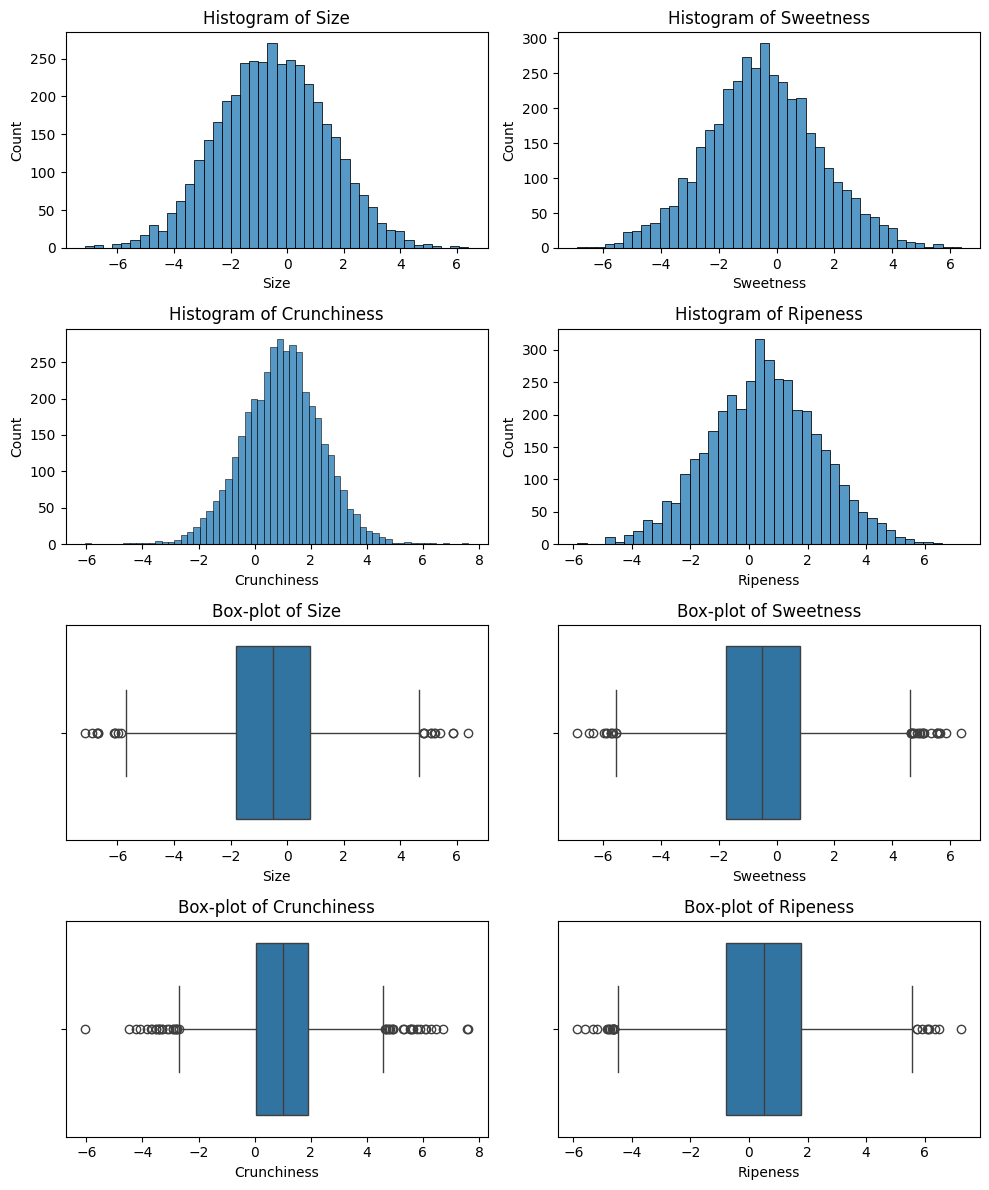

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 12))

plt.subplot(4, 2, 1)
sns.histplot(x=df['Size'])
plt.title('Histogram of Size')

plt.subplot(4, 2, 2)
sns.histplot(x=df['Sweetness'])
plt.title('Histogram of Sweetness')

plt.subplot(4, 2, 3)
sns.histplot(x=df['Crunchiness'])
plt.title('Histogram of Crunchiness')

plt.subplot(4, 2, 4)
sns.histplot(x=df['Ripeness'])
plt.title('Histogram of Ripeness')

plt.subplot(4, 2, 5)
sns.boxplot(x=df['Size'])
plt.title('Box-plot of Size')

plt.subplot(4, 2, 6)
sns.boxplot(x=df['Sweetness'])
plt.title('Box-plot of Sweetness')

plt.subplot(4, 2, 7)
sns.boxplot(x=df['Crunchiness'])
plt.title('Box-plot of Crunchiness')

plt.subplot(4, 2, 8)
sns.boxplot(x=df['Ripeness'])
plt.title('Box-plot of Ripeness')

plt.tight_layout()
plt.show()

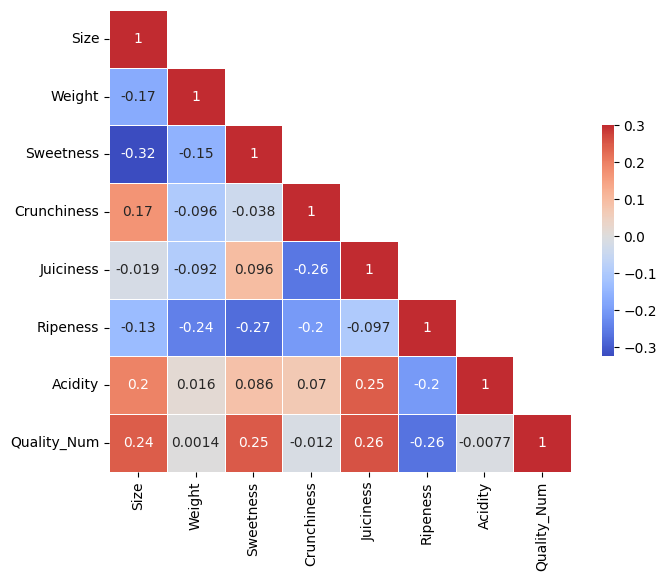

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr = df_cleaned.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

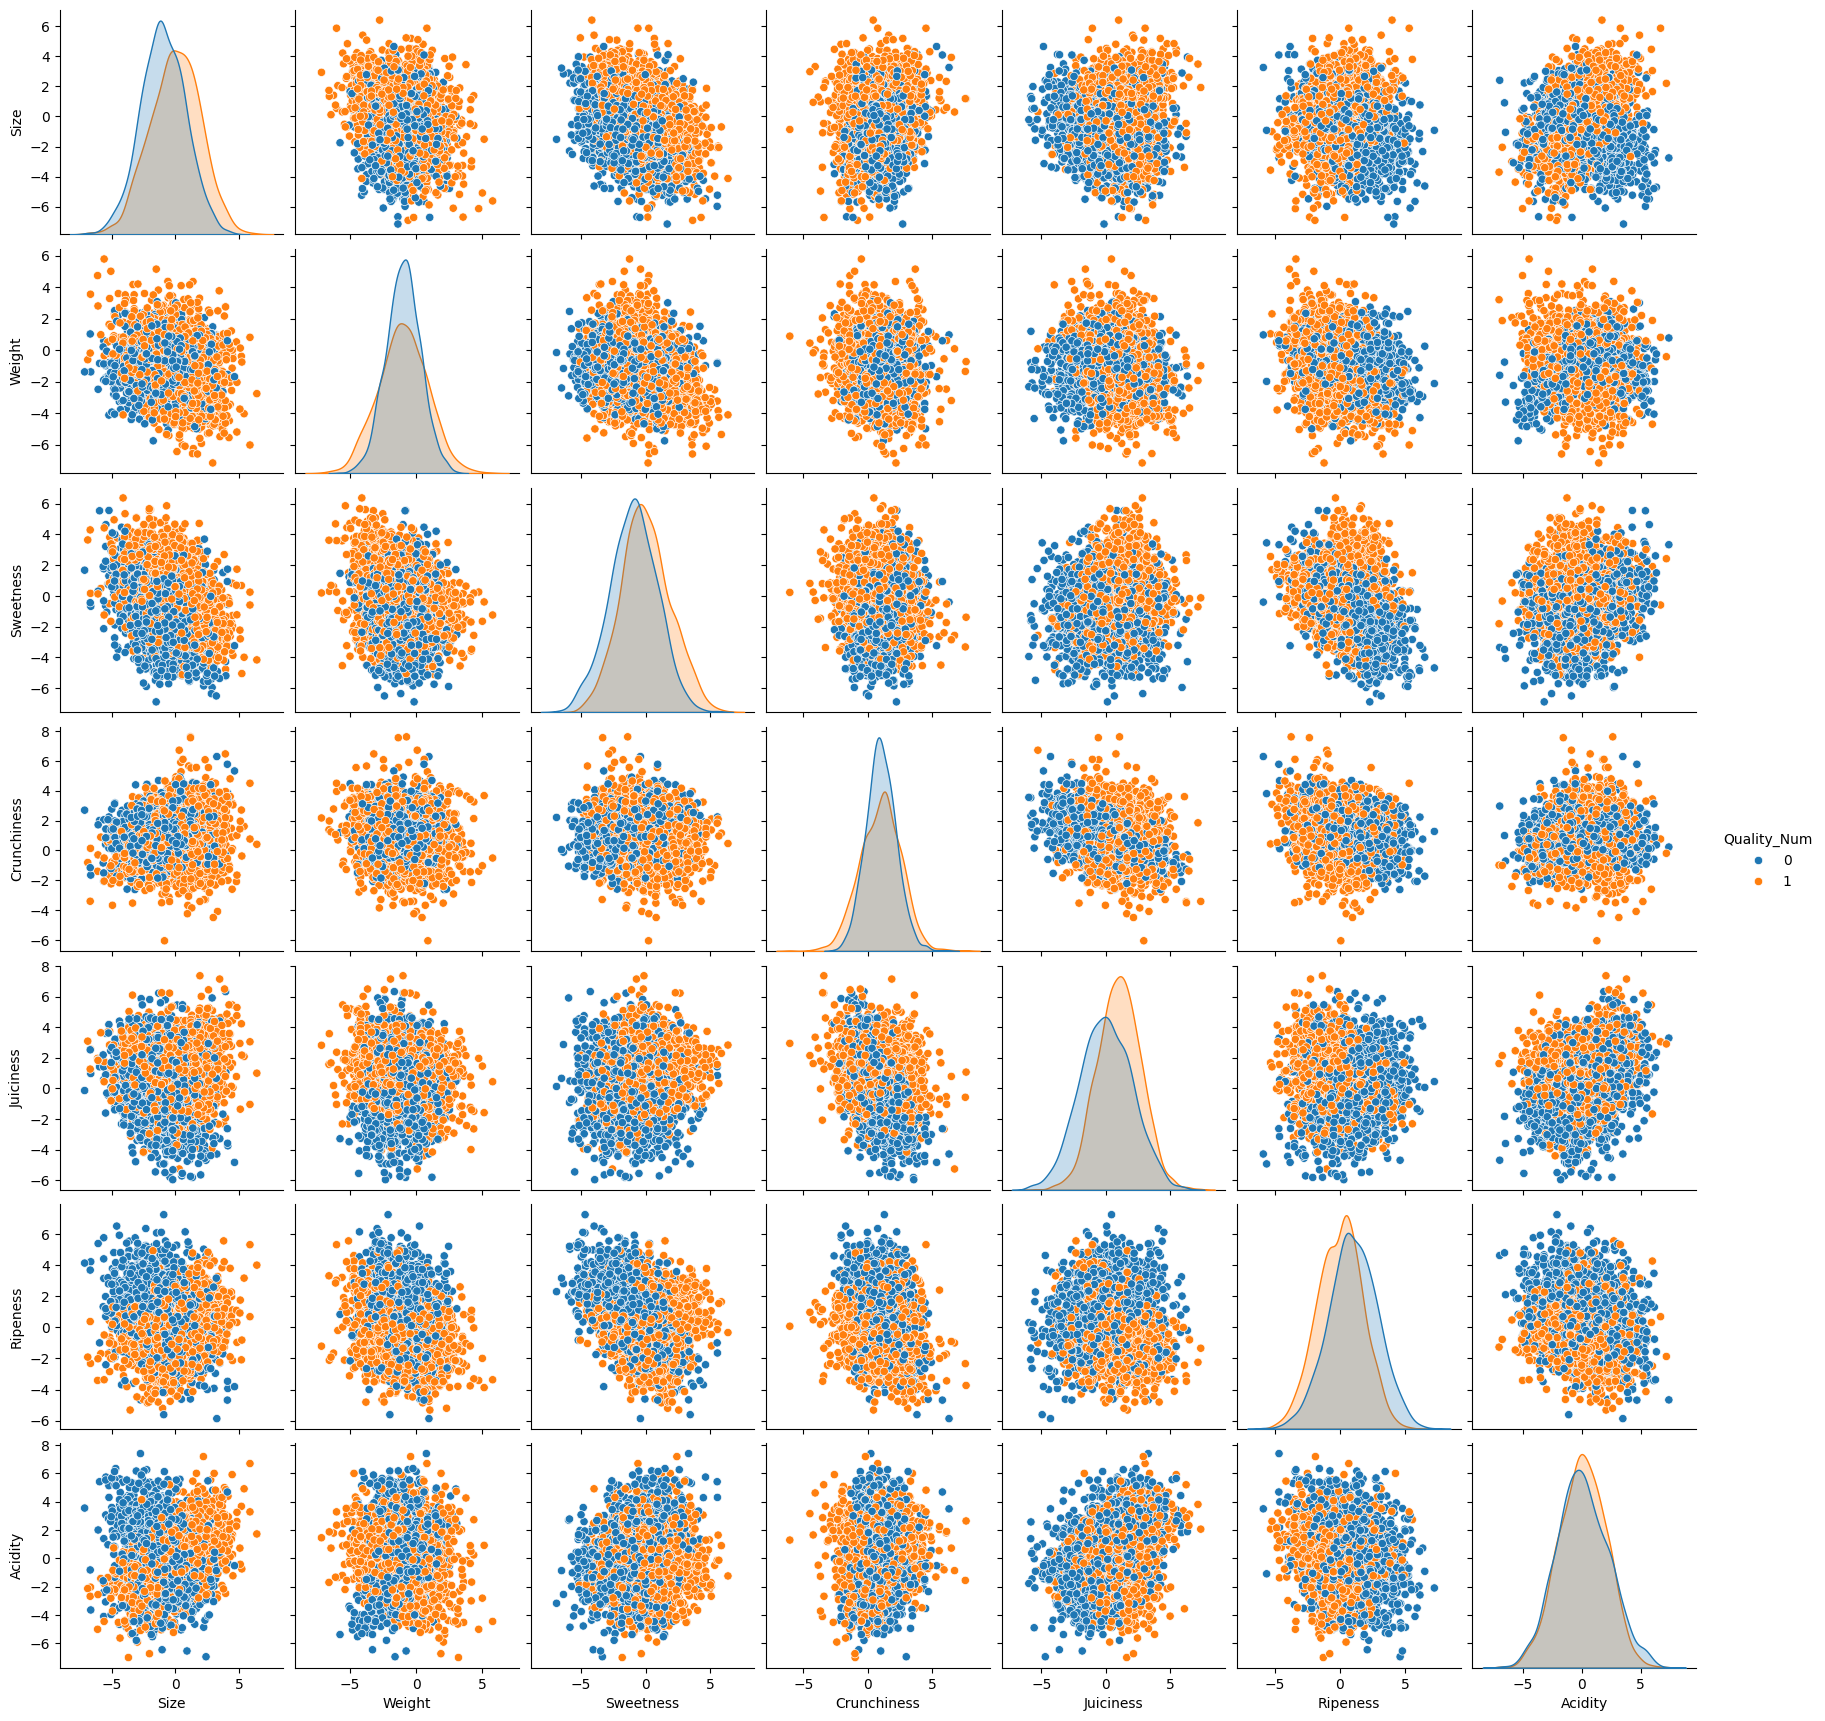

<Figure size 1000x600 with 0 Axes>

In [12]:
sns.pairplot(df_cleaned, hue='Quality_Num')
plt.figure(figsize= (10, 6))
plt.show()

In [13]:
#Quality predeiction with all measuers 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming 'Quality_Num' is the target and is a separate column in your DataFrame
# and all other columns are features
X = df_cleaned.drop('Quality_Num', axis=1)
y = df_cleaned['Quality_Num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.90


In [14]:
# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas series to make it easier to visualize the importances
features_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Display the feature importances
print("Feature Importances:")
print(features_series)

Feature Importances:
Ripeness       0.167783
Size           0.163293
Juiciness      0.156023
Sweetness      0.151892
Acidity        0.133216
Weight         0.118128
Crunchiness    0.109665
dtype: float64


In [15]:
#only using measures which you can determin without cutting into the apple
# Selecting predictors
X = df_cleaned[['Size', 'Weight', 'Ripeness']]
y = df_cleaned['Quality_Num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with your selected features
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.67


In [16]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Summarize feature importances
for feature, importance in zip(['Size', 'Weight', 'Ripeness'], importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Feature: Size, Importance: 0.3379
Feature: Weight, Importance: 0.3084
Feature: Ripeness, Importance: 0.3537
